In [43]:
import pandas as pd
ruta_archivo1 = 'C:\\Users\\valen\\OneDrive\\Documentos\\VALEN UAO\\ETI\\ACTIVIDAD2\\MLA_100k.jsonlines'
df = pd.read_json(ruta_archivo1, lines=True)

In [44]:
# Mostrar el número total de registros (filas) en el DataFrame
num_registros = df.shape[0]

print(f"La base de datos tiene {num_registros} registros.")


La base de datos tiene 100000 registros.


In [46]:
# Crear una copia de respaldo en otro DataFrame
respaldo_base = df.copy()

# Verificar que se haya copiado correctamente
print(respaldo_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [47]:
#Identificar variables tipo diccionario
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f" La columna '{col}' contiene valores tipo dict.")

 La columna 'seller_address' contiene valores tipo dict.
 La columna 'seller_contact' contiene valores tipo dict.
 La columna 'shipping' contiene valores tipo dict.
 La columna 'location' contiene valores tipo dict.
 La columna 'geolocation' contiene valores tipo dict.


In [48]:
df['location'].dropna().apply(lambda x: list(x.keys())).explode().value_counts()


location
open_hours      2219
neighborhood    2219
longitude       2219
country         2219
address_line    2219
latitude        2219
zip_code        2219
city            2219
state           2219
Name: count, dtype: int64

In [49]:
# La columna 'location' contiene información geográfica del vendedor (barrio, ciudad, país, coordenadas, etc.).
# Dado que el objetivo del análisis es identificar si un producto es nuevo o usado,
# la ubicación del vendedor no es un factor clave para la clasificación.
# Además, eliminar esta columna optimiza el almacenamiento y procesamiento de datos innecesarios.
# Si en el futuro se requiere un análisis basado en ubicación, se puede recuperar desde los datos originales.

df.drop(columns=['location'], inplace=True)

In [50]:
df['geolocation'].dropna().apply(lambda x: list(x.keys())).explode().value_counts()

geolocation
latitude     100000
longitude    100000
Name: count, dtype: int64

In [51]:
# La columna 'geolocation' contiene datos de latitud y longitud, que representan la ubicación geográfica del vendedor.
# En el contexto del análisis, que busca diferenciar entre productos nuevos y usados, la ubicación exacta no es un factor determinante.
# Además, esta información ya estaba en la columna 'location', que también fue eliminada.
# Mantener 'geolocation' ocuparía espacio innecesario y aumentaría la complejidad del procesamiento sin aportar valor al objetivo del estudio.

df.drop(columns=['geolocation'], inplace=True)


In [52]:
df['seller_contact'].dropna().apply(lambda x: list(x.keys())).explode().value_counts()

seller_contact
area_code2    2219
phone2        2219
webpage       2219
email         2219
contact       2219
area_code     2219
other_info    2219
phone         2219
Name: count, dtype: int64

In [53]:
# Eliminamos 'seller_contact' porque contiene información personal de los vendedores
# y no es relevante para analizar las características de los productos (nuevos/usados).
df.drop(columns=['seller_contact'], inplace=True)


In [54]:
df['seller_address'].dropna().apply(lambda x: list(x.keys())).explode().value_counts()


seller_address
comment            100000
longitude          100000
id                 100000
country            100000
address_line       100000
latitude           100000
search_location    100000
zip_code           100000
city               100000
state              100000
Name: count, dtype: int64

In [55]:
# Eliminamos 'seller_address' ya que contiene información geográfica detallada del vendedor
# que no aporta al análisis de si un producto es nuevo o usado.
df.drop(columns=['seller_address'], inplace=True)

In [56]:
df['shipping'].dropna().apply(lambda x: list(x.keys())).explode().value_counts()


shipping
local_pick_up    100000
tags             100000
free_shipping    100000
dimensions       100000
mode             100000
methods           96994
free_methods       3006
Name: count, dtype: int64

In [57]:
# Eliminamos 'shipping' porque contiene información sobre el envío,
# la cual no es relevante para determinar si un producto es nuevo o usado.
df.drop(columns=['shipping'], inplace=True)

In [58]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

warranty                                         object
sub_status                                       object
condition                                        object
deal_ids                                         object
base_price                                      float64
non_mercado_pago_payment_methods                 object
seller_id                                         int64
variations                                       object
site_id                                          object
listing_type_id                                  object
price                                           float64
attributes                                       object
buying_mode                                      object
tags                                             object
listing_source                                   object
parent_item_id                                   object
coverage_areas                                   object
category_id                                     

In [59]:
# Convertir las fechas a datetime
date_columns = ['last_updated', 'date_created']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [60]:
# Identificar columnas categóricas en el DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [61]:
# Verificar qué columnas contienen listas
for col in categorical_columns:
    unique_types = df[col].apply(type).unique()
    print(f"Columna '{col}' tiene los tipos: {unique_types}")

Columna 'warranty' tiene los tipos: [<class 'NoneType'> <class 'str'>]
Columna 'sub_status' tiene los tipos: [<class 'list'>]
Columna 'condition' tiene los tipos: [<class 'str'>]
Columna 'deal_ids' tiene los tipos: [<class 'list'>]
Columna 'non_mercado_pago_payment_methods' tiene los tipos: [<class 'list'>]
Columna 'variations' tiene los tipos: [<class 'list'>]
Columna 'site_id' tiene los tipos: [<class 'str'>]
Columna 'listing_type_id' tiene los tipos: [<class 'str'>]
Columna 'attributes' tiene los tipos: [<class 'list'>]
Columna 'buying_mode' tiene los tipos: [<class 'str'>]
Columna 'tags' tiene los tipos: [<class 'list'>]
Columna 'listing_source' tiene los tipos: [<class 'str'>]
Columna 'parent_item_id' tiene los tipos: [<class 'str'> <class 'NoneType'>]
Columna 'coverage_areas' tiene los tipos: [<class 'list'>]
Columna 'category_id' tiene los tipos: [<class 'str'>]
Columna 'descriptions' tiene los tipos: [<class 'list'>]
Columna 'international_delivery_mode' tiene los tipos: [<clas

In [62]:
# Convertir listas a strings en 'sub_status' y 'tags'
for col in ['sub_status', 'tags']:
    df[col] = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Convertir a tipo 'category'
categorical_columns = ['warranty', 'sub_status', 'condition', 'site_id', 
                       'listing_type_id', 'buying_mode', 'tags', 
                       'listing_source', 'category_id', 'status']

df[categorical_columns] = df[categorical_columns].astype('category')

# Verificar cambios
print(df[categorical_columns].dtypes)

warranty           category
sub_status         category
condition          category
site_id            category
listing_type_id    category
buying_mode        category
tags               category
listing_source     category
category_id        category
status             category
dtype: object


In [63]:
#revisar las categorias
for col in categorical_columns:
    print(f"Columna: {col}")
    print(df[col].value_counts(), "\n")

Columna: warranty
warranty
Sí                                                                                                                                                                                                                                   5682
Sin garantía                                                                                                                                                                                                                         5442
SI                                                                                                                                                                                                                                    592
6 meses                                                                                                                                                                                                                               547
6 MESES                              

In [64]:
# Eliminamos variables irrelevantes que no aportan al análisis
columns_to_drop = ['site_id', 'listing_source', 'tags']
df.drop(columns=columns_to_drop, inplace=True)

# Justificación:
# - 'site_id' solo tiene un valor único ('MLA'), por lo que no aporta información útil.
# - 'listing_source' está vacío en todos los registros, por lo que no nos sirve.
# - 'tags' tiene múltiples valores combinados en una sola celda, lo que dificulta su análisis sin una transformación compleja.

In [65]:
# Limpiamos la columna 'warranty' para estandarizar los valores
def clean_warranty(value):
    if pd.isna(value):
        return 'No Especificado'
    value = str(value).lower().strip()
    if 'mes' in value or 'año' in value or value.isdigit():
        return 'Tiempo Definido'
    elif value in ['sí', 'si', 'yes']:
        return 'SI'
    elif 'sin garantía' in value:
        return 'No'
    return 'Otro'

df['warranty'] = df['warranty'].apply(clean_warranty)

# Justificación:
# - 'warranty' tiene valores inconsistentes (ej: 'Sí', 'SI', '6 MESES').
# - Normalizamos a categorías clave: 'SI', 'No', 'Tiempo Definido', 'Otro'.

In [66]:
# Convertimos variables categóricas a tipo 'category' para optimizar memoria
categorical_columns = ['warranty', 'sub_status', 'condition', 'listing_type_id', 'buying_mode', 'category_id', 'status']
df[categorical_columns] = df[categorical_columns].astype('category')

# Justificación:
# - Convertir a 'category' reduce el uso de memoria y mejora la eficiencia.
# - Estas columnas representan categorías discretas, no valores numéricos continuos.

# Mostramos información final para verificar cambios
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   warranty                          39104 non-null   category           
 1   sub_status                        100000 non-null  category           
 2   condition                         100000 non-null  category           
 3   deal_ids                          100000 non-null  object             
 4   base_price                        100000 non-null  float64            
 5   non_mercado_pago_payment_methods  100000 non-null  object             
 6   seller_id                         100000 non-null  int64              
 7   variations                        100000 non-null  object             
 8   listing_type_id                   100000 non-null  category           
 9   price                             100000 non-null

In [67]:
print(df["non_mercado_pago_payment_methods"].iloc[0])  # Muestra el contenido de la primera fila

[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}]


In [68]:
# Eliminamos la columna de métodos de pago no relacionados con Mercado Pago
df.drop(columns=['non_mercado_pago_payment_methods'], inplace=True)

In [69]:
print(df["variations"].iloc[0])  # Muestra el contenido de la primera fila

[]


In [70]:
print(df["attributes"].iloc[0])  # Muestra el contenido de la primera fila

[]


In [71]:
#Verificar si están vacias
df["variations"].apply(lambda x: len(x) > 0).sum()
df["attributes"].apply(lambda x: len(x) > 0).sum()

np.int64(12425)

In [72]:
# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

# Mostrar el resultado
print(porcentaje_faltantes)

warranty                        60.896
sub_status                       0.000
condition                        0.000
deal_ids                         0.000
base_price                       0.000
seller_id                        0.000
variations                       0.000
listing_type_id                  0.000
price                            0.000
attributes                       0.000
buying_mode                      0.000
parent_item_id                  23.011
coverage_areas                   0.000
category_id                      0.000
descriptions                     0.000
last_updated                     0.000
international_delivery_mode      0.000
pictures                         0.000
id                               0.000
official_store_id               99.182
differential_pricing           100.000
accepts_mercadopago              0.000
original_price                  99.857
currency_id                      0.000
thumbnail                        0.000
title                    

In [73]:
#Desde una perspectiva estadística, las columnas con más del 80% de valores faltantes aportan poca información útil al análisis.  
#Dado que la mayoría de los registros carecen de datos en estas variables, su inclusión podría introducir sesgos o ruido en el modelo.  
#Eliminarlas mejora la calidad del dataset, reduciendo la dimensionalidad y facilitando el análisis sin pérdida significativa de información relevante.  


In [74]:
# Ver porcentaje de valores nulos
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

# Identificar columnas con más del 80% de valores nulos
columnas_a_eliminar = porcentaje_faltantes[porcentaje_faltantes > 80].index

# Eliminar columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# Verificar que se eliminaron
print("Columnas eliminadas:", list(columnas_a_eliminar))
print("Columnas actuales:", df.columns)

Columnas eliminadas: ['official_store_id', 'differential_pricing', 'original_price', 'video_id', 'catalog_product_id', 'subtitle']
Columnas actuales: Index(['warranty', 'sub_status', 'condition', 'deal_ids', 'base_price',
       'seller_id', 'variations', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'parent_item_id', 'coverage_areas', 'category_id',
       'descriptions', 'last_updated', 'international_delivery_mode',
       'pictures', 'id', 'accepts_mercadopago', 'currency_id', 'thumbnail',
       'title', 'automatic_relist', 'date_created', 'secure_thumbnail',
       'stop_time', 'status', 'initial_quantity', 'start_time', 'permalink',
       'sold_quantity', 'available_quantity'],
      dtype='object')


In [75]:
# Eliminamos las siguientes variables porque no aportan información clave para nuestro análisis de condición del producto (nuevo/usado):
# - 'warranty', 'sub_status': Información adicional que no impacta directamente en la clasificación de estado del producto.
# - 'variations': Diferencias dentro del mismo producto, pero no ayudan a distinguir entre nuevo y usado.
# - 'listing_type_id', 'buying_mode': Tipo de publicación y modo de compra, no influyen en la condición del producto.
# - 'descriptions', 'pictures', 'thumbnail', 'secure_thumbnail': Información visual y descriptiva que no necesitamos para clasificar el estado del producto.
# - 'accepts_mercadopago': No está relacionado con si el producto es nuevo o usado.
# - 'currency_id': Información sobre la moneda de la transacción, irrelevante para nuestro objetivo.
# - 'title', 'subtitle', 'permalink': Metadatos de la publicación sin impacto en la condición del producto.
# - 'automatic_relist': No afecta si un producto es nuevo o usado.
# - 'video_id': Contenido no relevante para nuestra clasificación.

In [76]:
columnas_a_eliminar = [
    'warranty', 'sub_status', 'variations','deal_ids' ,'listing_type_id', 
    'attributes', 'buying_mode', 'descriptions', 'pictures', 'accepts_mercadopago',
    'currency_id', 'thumbnail', 'title', 'automatic_relist', 'secure_thumbnail', 'permalink','coverage_areas','international_delivery_mode'
]

df = df.drop(columns=columnas_a_eliminar)

In [77]:
# Mostrar los nombres de las columnas que quedan
print(df.columns)

Index(['condition', 'base_price', 'seller_id', 'price', 'parent_item_id',
       'category_id', 'last_updated', 'id', 'date_created', 'stop_time',
       'status', 'initial_quantity', 'start_time', 'sold_quantity',
       'available_quantity'],
      dtype='object')


In [78]:
# Mostramos información final para verificar cambios
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   condition           100000 non-null  category           
 1   base_price          100000 non-null  float64            
 2   seller_id           100000 non-null  int64              
 3   price               100000 non-null  float64            
 4   parent_item_id      76989 non-null   object             
 5   category_id         100000 non-null  category           
 6   last_updated        100000 non-null  datetime64[ns, UTC]
 7   id                  100000 non-null  object             
 8   date_created        100000 non-null  datetime64[ns, UTC]
 9   stop_time           100000 non-null  datetime64[ns, UTC]
 10  status              100000 non-null  category           
 11  initial_quantity    100000 non-null  int64              
 12  start_time       

In [81]:
# Reemplazar valores nulos en la columna 'parent_item_id' por 'Sin_Registro'
df.update(df["parent_item_id"].fillna("Sin_Registro"))

In [38]:
# Variables clave para el análisis y la predicción de la condición del producto

# condition: Variable objetivo o repuesta, indica si el producto es nuevo o usado.
# base_price: Precio original del producto, útil para comparar con el precio final y detectar descuentos.
# seller_id: Identificación del vendedor, puede ayudar a analizar tendencias entre distintos vendedores.
# price: Precio final del producto, importante para entender estrategias de precios.
# parent_item_id: Identificación del producto base, útil para agrupar productos similares.
# category_id: Categoría del producto, permite analizar diferencias entre tipos de productos.
# last_updated: Última actualización del producto, podría indicar cambios en la oferta.
# id: Identificador único del producto, necesario para el seguimiento de cada publicación.
# date_created: Fecha de creación de la publicación, útil para calcular antigüedad de la oferta.
# stop_time: Fecha en la que la publicación finalizó, permite calcular la duración de la oferta.
# status: Estado actual de la publicación (activa, finalizada, etc.), importante para filtrar datos.
# initial_quantity: Cantidad inicial disponible del producto, ayuda a entender el stock.
# start_time: Fecha en la que comenzó la publicación, necesaria para cálculos de duración.
# sold_quantity: Cantidad vendida, clave para medir demanda y éxito del producto.
# available_quantity: Cantidad restante disponible, útil para conocer la rotación del stock.

In [87]:
#Para mejoras los análisis podemos convertir las variables tipo fecha a columnas detalladas.
# Creamos nuevas columnas detalladas
df["year_created"] = df["date_created"].dt.year
df["month_created"] = df["date_created"].dt.month
df["day_created"] = df["date_created"].dt.day
df["weekday_created"] = df["date_created"].dt.weekday  # 0=Lunes, 6=Domingo
df["hour_created"] = df["date_created"].dt.hour

df["year_start"] = df["start_time"].dt.year
df["month_start"] = df["start_time"].dt.month
df["day_start"] = df["start_time"].dt.day
df["weekday_start"] = df["start_time"].dt.weekday
df["hour_start"] = df["start_time"].dt.hour

df["year_stop"] = df["stop_time"].dt.year
df["month_stop"] = df["stop_time"].dt.month
df["day_stop"] = df["stop_time"].dt.day
df["weekday_stop"] = df["stop_time"].dt.weekday
df["hour_stop"] = df["stop_time"].dt.hour

df["listing_duration_days"] = (df["stop_time"] - df["start_time"]).dt.days  # Duración en días



In [88]:
# Lista de columnas originales de fecha a eliminar
columnas_a_eliminar = ["date_created", "start_time", "stop_time"]

# Eliminamos las columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

In [89]:
# Verificamos cambios
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   condition              100000 non-null  category           
 1   base_price             100000 non-null  float64            
 2   seller_id              100000 non-null  int64              
 3   price                  100000 non-null  float64            
 4   parent_item_id         100000 non-null  object             
 5   category_id            100000 non-null  category           
 6   last_updated           100000 non-null  datetime64[ns, UTC]
 7   id                     100000 non-null  object             
 8   status                 100000 non-null  category           
 9   initial_quantity       100000 non-null  int64              
 10  sold_quantity          100000 non-null  int64              
 11  available_quantity     100000 non-null  

In [90]:
# Se ha transformado la columna de fechas en múltiples características detalladas:
# - Se han extraído el año, mes, día, día de la semana y hora para las fechas 'date_created', 'start_time' y 'stop_time'.
# - Esto permite un análisis temporal más preciso, facilitando estudios de tendencias y patrones de publicación.
#
# El dataset final contiene 28 columnas con los siguientes tipos de datos:
# - 3 columnas categóricas ('condition', 'category_id', 'status'), útiles para clasificar los productos.
# - 1 columna de tipo datetime ('last_updated') con la fecha de última actualización del producto.
# - 2 columnas de tipo float64 ('base_price', 'price'), que representan valores monetarios.
# - 5 columnas de tipo int64 (ej. 'seller_id', 'initial_quantity', 'sold_quantity'), relevantes para el análisis de ventas.
# - 15 columnas de tipo int32 derivadas de las fechas, lo que optimiza la memoria y facilita el análisis temporal.
# - 2 columnas de tipo object ('parent_item_id', 'id'), que podrían convertirse a categóricas si es necesario.
#
# Adicionalmente, se ha calculado 'listing_duration_days', que indica la duración de cada publicación en días.
# Esta variable es clave para analizar el tiempo de vida de los productos en la plataforma y su relación con las ventas.


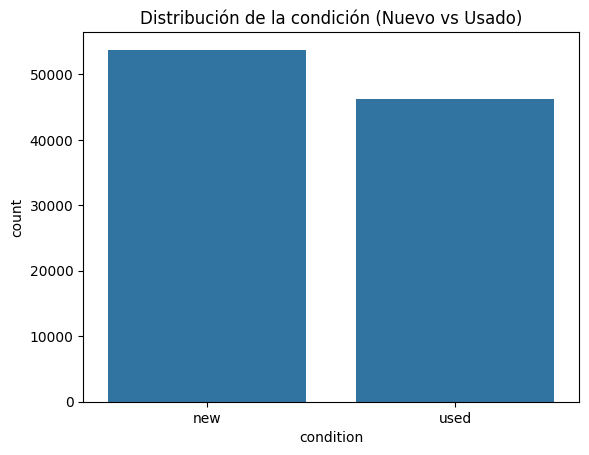

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribución de la condición del producto
sns.countplot(x=df["condition"])
plt.title("Distribución de la condición (Nuevo vs Usado)")
plt.show()


In [91]:
# Guardar el DataFrame con 16 columnas en un archivo CSV
df.to_csv("dataset_limpio.csv", index=False, encoding="utf-8")